In [1]:
import pandas as pd

### HS labels

👓 Structure of HS2012 labels: https://unstats.un.org/unsd/classifications/Econ/Structure

For the metals, we choose all forms but those related to waste and scrap as that will be modelled in a later phase

We neglect wrought forms. As the transport for final products is expected to be modelled in ecoinvent

In [2]:
metals = {
    # Chapter 26 - Ores, slag and ash 
    'stibnite': [261710], # 261710 - Antimony ores and concentrates
    'bauxite': [260600], # 260600 - Aluminium ores and concentrates
    'chromite': [261000], # 261000 - Chromium ores and concentrates
    'cobalt_ore': [260500], # 260500 - Cobalt ores and concentrates
    'copper_ore': [260300], # 260300 - Copper ores and concentrates 
    'iron_ore': [260111,260120], # 260111 - Iron ores and concentrates; non-agglomerated 
                                 # 260112 - Iron ores and concentrates; agglomerated (excluding roasted iron pyrites)
    'lead_ore': [260700], # 260700 - Lead ores and concentrates 
    'manganese_ore': [260200], # 260200 - Manganese ores and concentrates, including ferruginous manganese ores and concentrates with a manganese content of 20% or more, calculated on the dry weight 
    'molybdenite': [261310,261390], # 261310 - Molybdenum ores and concentrates; roasted 
                                    # 261390 - Molybdenum ores and concentrates; other than roasted
    'nickel_ore': [260400], #  260400 - Nickel ores and concentrates
    'phosphate_rock': [251010,251020], # 251010 - Natural calcium phosphates, natural aluminium calcium phosphates and phosphatic chalk; unground 
                                       # 251020 - Natural calcium phosphates, natural aluminium calcium phosphates and phosphatic chalk; ground
    'silver_ore': [261610], # 261610 - Silver ores and concentrates
    'tantalum_vanadium_niobium_ore': [261590], # 261590 - Niobium, tantalum, vanadium ores and concentrates 
    'tin_ore': [260900], # 260900 - Tin ores and concentrates 
    'titanium_ore': [261400], # 261400 - Titanium ores and concentrates
    'tungsten_ore': [261100], # 261100 - Tungsten ores and concentrates 
    'uranium_ore': [261210], # 261210 - Uranium ores and concentrates 
    'zinc_ore': [260800], # 260800 - Zinc ores and concentrates
    # Chapter 28 - Inorganic chemicals; organic and inorganic compounds of precious metals; 
    #              of rare earth metals, of radio-active elements and of isotopes
    'aluminium_hydroxide': [281830], # 281830 - Aluminium hydroxide 
    'aluminium_oxide': [281820], # 281820 - Aluminium oxide; other than artificial corundum
    'other_hydroxide': [282590], # 282590 - Inorganic bases, metal oxides, hydroxides and peroxides; n.e.c. in heading no. 2825
    'other_borate': [284020], # 284020 - Borates; n.e.c. in heading no. 2840
    'sodium_borate': [284019], # 284019 - Borates; disodium tetraborate (refined borax), other than anhydrous
    'boric_oxid_acid': [281000], # 281000 - Oxides of boron; boric acids
    'cobalt_hydroxide': [282200], # 282200 - Cobalt oxides and hydroxides; commercial cobalt oxides 
    'other_sulfate': [283329], # 283329 - Sulphates; n.e.c. in item no. 2833.2
    'phosphorous': [280470], # 280470 - Phosphorus 
    'phosphoric_acid': [280920], # 280920 - Phosphoric acid and polyphosphoric acids 
    'potash': [281520], # 281520 - Potassium hydroxide (caustic potash) 
    'reo_scandium_yttrium': [280530], #  280530 - Earth-metals, rare; scandium and yttrium, whether or not intermixed or interalloyed
    'selenium': [280490], #  280490 - Selenium 
    'sulfur': [280200], #  280200 - Sulphur; sublimed or precipitated, colloidal sulphur 
    'vanadium_oxide': [282530], # 282530 - Vanadium oxides and hydroxides
    'lithium_hydroxide': [282520], # 282520 - Lithium oxide and hydroxide
    'other_chloride': [282739], # 282739 - Chlorides; other than of ammonium, calcium, magnesium, aluminium and nickel
    'lithium_carbonate': [283691], # 283691 - Carbonates; lithium carbonate
    'other_carbonate': [283699], # 283699 - Carbonates; n.e.c. in heading no. 2836 and other than lithium or strontium
    'other_carbide': [284990], #  284990 - Carbides; whether or not chemically defined, other than of calcium or silicon
    'other_fluoride': [282619, 282690], # 282619 - Fluorides; other than of aluminium
                                        # 282690 - Fluorides; fluorosilicates, fluoroaluminates and other complex fluorine salts, n.e.c. in heading no. 2826
    'silicon': [280461], # 280461 - Silicon; containing by weight not less than 99.99% of silicon 
    # Metals
    'antimony': [811010], # 811010 - Antimony and articles thereof; unwrought antimony, powders
    'aluminium': [760110], # 760110 - Aluminium; unwrought, (not alloyed)
    'aluminium_cast_alloy': [760120], # 760120 - Aluminium; unwrought, alloys 
    'bentonite': [250810], # 250810 - Clays (excluding expanded clays of heading no. 6806); bentonite, whether or not calcined
    'beryllium': [811212], # 811212 - Beryllium and articles thereof; unwrought beryllium, powders
    'boron_tellurium': [280450], # 280450 - Boron; tellurium
    'cadmium': [810720], # 810720 - Cadmium; unwrought, powders
    'chromium': [811221], # 811221 - Chromium and articles thereof; unwrought chromium, powders
    'cobalt': [810520], # 810520 - Cobalt; mattes and other intermediate products of cobalt metallurgy, unwrought cobalt, powders
    'copper_anode': [740200], # 740200 - Copper; unrefined, copper anodes for electrolytic refining
    'copper_cathode': [740311], # 740311 - Copper; refined, unwrought, cathodes and sections of cathodes
    'ga_ge_hf_in_nb_rh_va': [811292], # 811292 - Gallium, germanium, hafnium, indium, niobium (columbium), rhenium and vanadium; 
                                      # articles thereof, unwrought, including waste and scrap, powders
    'gold': [710811,710812], # 710811 - Metals; gold, non-monetary, powder
                             # 710812 - Metals; gold, non-monetary, unwrought (but not powder)
    'graphite': [250410, 250490], # 250410 - Graphite; natural, in powder or in flakes
                                  #  250490 - Graphite; natural, in other forms, excluding powder or flakes
    # graphite = [690310] # 690310 - Refractory ceramic goods; containing by weight more than 50% of graphite or other forms of carbon or of a mixture of these products, excluding those of siliceous fossil meals or similar earths 

    'pgm': [711041], # 711041 - Metals; iridium, osmium, ruthenium, unwrought or in powder form 
    'pig_iron': [720110, 720120, 720150], # 720110 - Iron; non-alloy pig iron containing by weight 0.5% or less of phosphorus, in pigs, blocks or other primary forms
                                          # 720120 - Iron; non-alloy pig iron containing by weight more than 0.5% of phosphorus, in pigs, blocks or other primary forms
                                          # 720150 - Iron; alloy pig iron, spiegeleisen, in pigs, blocks or other primary forms
    'lead': [780110,780191,780199], # 780110 - Lead; unwrought, refined
                                    # 780191 - Lead; unwrought, unrefined, containing by weight antimony as the principal other element
                                    # 780199 - Lead; unwrought, unrefined, not containing by weight antimony as the principal other element


    'dolomite': [251810,251820,251830], #  2518 - Dolomite, whether or not calcined or sintered; including dolomite roughly trimmed, or merely cut by sawing or otherwise into blocks or slabs of rectangular (including square) shape; dolomite ramming mix
    'magnesium': [810411,810419], # 810411 - Magnesium; unwrought, containing at least 99.8% by weight of magnesium 
                                  # 810419 - Magnesium; unwrought, containing less than 99.8% by weight of magnesium 
    'manganese': [811100], # 811100 - Manganese; articles thereof, including waste and scrap
    'molybdenum': [810294], # 810294 - Molybdenum; unwrought, including bars and rods obtained simply by sintering 
    'nickel': [750210], # 750210 - Nickel; unwrought, not alloyed 
    'niobium': [720293], # 720293 - Ferro-alloys; ferro-niobium 
    'palladium': [711021], # 711021 - Metals; palladium, unwrought or in powder form 
    'platinum': [711011], #  711011 - Metals; platinum, unwrought or in powder form 
    'silica_sand': [250510], #  250510 - Sands; natural, silica and quartz sands, whether or not coloured 
    'tin': [800110], #  800110 - Tin; unwrought, not alloyed 
    'titanium': [810820], # 810820 - Titanium; unwrought, powders 
    'zinc': [790111, 790112], # 790111 - Zinc; unwrought, (not alloyed), containing by weight 99.99% or more of zinc 
                              # 790112 - Zinc; unwrought, (not alloyed), containing by weight less than 99.99% of zinc
}

# Filter data

The csv coming from UNCTAD are too large. I need to filter them first. Then, I will be working with the dataframe where I have merged all modes of transport for the relevant metals.

In [3]:
def filter_and_save(df, filename, mode='w'):
    # Filter rows based on HS2012Product values in the metals dictionary
    filtered_df = df[df['HS2012Product'].isin([code for metal_codes in metals.values() for code in metal_codes])]
    # Save or append to CSV
    filtered_df.to_csv(filename, mode=mode, header=(mode == 'w'), index=False)

In [5]:
df_road = pd.read_csv('US_TransportCosts_Road_Detail_ST202101141213_v1.csv')
# Filter and save rows from the first dataframe
filter_and_save(df_road, 'filtered_metals_UNCTAD.csv', mode='w')

In [6]:
df_railway = pd.read_csv('US_TransportCosts_Railway_Detail_ST202101141253_v1.csv')
# Filter and append rows from the second dataframe
filter_and_save(df_railway, 'filtered_metals_UNCTAD.csv', mode='a')

In [5]:
df_air = pd.read_csv('US_TransportCosts_Air_Detail_ST202101141441_v1.csv')
# Filter and append rows from the third dataframe
filter_and_save(df_air, 'filtered_metals_UNCTAD.csv', mode='a')

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_25788\1596758414.py:1: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_air = pd.read_csv('US_TransportCosts_Air_Detail_ST202101141441_v1.csv')


In [4]:
df_sea = pd.read_csv('US_TransportCosts_Sea_Detail_ST202101141129_v1.csv')
# Filter and append rows from the fourth dataframe
filter_and_save(df_sea, 'filtered_metals_UNCTAD.csv', mode='a')

# Weighted average

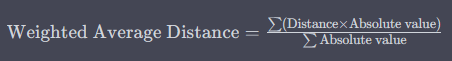

In [12]:
df = pd.read_csv('filtered_metals_UNCTAD.csv')
# Map the HS2012Product to metal names and create a new column 'Metal'
df['Metal'] = df['HS2012Product'].map({code: metal for metal, codes in metals.items() for code in codes})

In [13]:
# Function to compute the weighted average distance for a group
def weighted_avg_distance(group):
    country = group['Origin Label'].iloc[0]
    metal = group['Metal'].iloc[0]
    total_absolute_value = total_absolute_values[country, metal]
    
    total_weighted_distance = (gr-oup['Distance'] * group['Absolute value']).sum()
    
    # Check if total_absolute_value is not zero to avoid division by zero
    if total_absolute_value != 0:
        return total_weighted_distance / total_absolute_value
    else:
        return float('nan')  # or any other placeholder value you prefer

In [14]:
# Compute the total absolute value for each combination of country and metal
total_absolute_values = df.groupby(['Origin Label', 'Metal'])['Absolute value'].sum()

In [15]:
# Compute the weighted average distance for each combination of country, metal, and mode of transport
result = df.groupby(['Origin Label', 'Metal', 'TransportMode Label']).apply(weighted_avg_distance).reset_index()
result.columns = ['Origin Label', 'Metal', 'TransportMode Label', 'Weighted Average Distance']

In [16]:
result.to_csv('transport_markets_data.csv', index=False)

# Exploring the data

In [7]:
df_air = pd.read_csv('US_TransportCosts_Air_Detail_ST202101141441_v1.csv')

C:\Users\hahnme_a\AppData\Local\Temp\ipykernel_16272\1425541855.py:1: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_air = pd.read_csv('US_TransportCosts_Air_Detail_ST202101141441_v1.csv')


In [8]:
zinc_codes = metals['zinc_ore']
# Filter rows for Chile and Zinc
chile_zinc_df = df_air[(df_air['Origin Label'] == 'Chile') & (df_air['HS2012Product'].isin(zinc_codes))]

print(chile_zinc_df)

          Year  Origin Origin Label  Destination  \
15200744  2016     152        Chile            4   
15205721  2016     152        Chile            8   
15210698  2016     152        Chile           12   
15215675  2016     152        Chile           24   
15220652  2016     152        Chile           31   
...        ...     ...          ...          ...   
15808266  2016     152        Chile          860   
15813243  2016     152        Chile          862   
15818220  2016     152        Chile          887   
15823197  2016     152        Chile          894   
15828174  2016     152        Chile          926   

                       Destination Label  HS2012Product  \
15200744                     Afghanistan         260800   
15205721                         Albania         260800   
15210698                         Algeria         260800   
15215675                          Angola         260800   
15220652                      Azerbaijan         260800   
...                  

In [10]:
chile_zinc_df.to_csv('delete1.csv')

In [9]:
# Filter rows for exports from China to China and where Absolute value is not NaN
china_exports_df = df_air[(df_air['Origin Label'] == 'China') & 
                          (df_air['Destination Label'] == 'China') & 
                          (~df_air['Absolute value'].isna())]

print(china_exports_df)

          Year  Origin Origin Label  Destination Destination Label  \
15956694  2016     156        China          156             China   
15956695  2016     156        China          156             China   
15956697  2016     156        China          156             China   
15956698  2016     156        China          156             China   
15956699  2016     156        China          156             China   
...        ...     ...          ...          ...               ...   
15960180  2016     156        China          156             China   
15960181  2016     156        China          156             China   
15960182  2016     156        China          156             China   
15960183  2016     156        China          156             China   
15960184  2016     156        China          156             China   

          HS2012Product                                HS2012Product Label  \
15956694          20230  Frozen, boneless meat of bovine animals - kilo...   
159

In [11]:
china_exports_df.to_csv('delete2.csv')